In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('mental-health-survey/train.csv')
print(train.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees   ...     \
0             No       Yes          Often            6-25   ...      
1             No        No         Rarely  More than 1000   ...      
2             No        No         Rarely            6-25   ...      
3            Yes       Yes          Often          26-100   ...      
4             No        No          Never         100-500   ...      

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No      

In [3]:
print(train.shape)
print(train.columns)

(1259, 27)
Index([u'Timestamp', u'Age', u'Gender', u'Country', u'state', u'self_employed',
       u'family_history', u'treatment', u'work_interfere', u'no_employees',
       u'remote_work', u'tech_company', u'benefits', u'care_options',
       u'wellness_program', u'seek_help', u'anonymity', u'leave',
       u'mental_health_consequence', u'phys_health_consequence', u'coworkers',
       u'supervisor', u'mental_health_interview', u'phys_health_interview',
       u'mental_vs_physical', u'obs_consequence', u'comments'],
      dtype='object')


In [4]:
train.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
print(train.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [6]:
train = train.drop(['state','work_interfere','comments','Timestamp'],axis=1)
print(train.shape)

(1259, 23)


In [7]:
print(train.isnull().sum())

Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64


In [8]:
train = train.dropna(axis=0)
print(train.shape)
print(train.isnull().sum())

(1241, 23)
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [9]:
print(train.Gender.unique())

['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [10]:
train["Gender_new"] = train["Gender"].apply(lambda x: 3 if "trans" in x.lower() or "queer" in x.lower() else 2 if "female" in x.lower() or "f" == x.lower() or "femail" in x.lower() or "femake" in x.lower() else 1 if "male" in x.lower() or "m" in x.lower() or "mail" in x.lower() or "msle" in x.lower() or "malr" in x.lower() or "man" in x.lower() else 3)

In [11]:
print(train["Gender_new"].unique())

[1 2 3]


In [12]:
print(train["Country"].unique())

['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria' 'Croatia'
 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']


In [13]:
print(range(50))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [14]:
train["Country_new"] = train["Country"].replace(['United States', 'France', 'United Kingdom', 'Canada', 'Portugal','Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia','Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria', 'Ireland', 'India','South Africa', 'Italy', 'Bulgaria', 'Sweden', 'Colombia', 'Latvia', 'Romania','Belgium', 'New Zealand', 'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel','Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia','Norway', 'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova', 'Georgia','China', 'Czech Republic', 'Philippines'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [15]:
print(train["Country_new"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


In [16]:
train["self_employed"].unique()
train["self_employed_new"] = train["self_employed"].replace(['Yes', 'No'],[1,2])
print(train["self_employed_new"].unique())

[1 2]


In [17]:
print(train["family_history"].unique())
train["family_history_new"] = train["family_history"].replace(['Yes', 'No'],[1,2])
print(train["family_history_new"].unique())

['Yes' 'No']
[1 2]


In [18]:
print(train["treatment"].unique())
train["treatment_new"] = train["treatment"].replace(['Yes', 'No'],[1,2])
print(train["treatment_new"].unique())

['No' 'Yes']
[2 1]


In [19]:
print(train["no_employees"].unique())
train["no_employees_new"] = train["no_employees"].replace(['1-5', '6-25', '100-500', '26-100', 'More than 1000', '500-1000'],[1,2,3,4,5,6])
print(train["no_employees_new"].unique())

['1-5' '6-25' '100-500' '26-100' 'More than 1000' '500-1000']
[1 2 3 4 5 6]


In [21]:
print(train["remote_work"].unique())
train["remote_work_new"] = train["remote_work"].replace(['Yes', 'No'],[1,2])
print(train["remote_work_new"].unique())

['Yes' 'No']
[1 2]


In [22]:
print(train["tech_company"].unique())
train["tech_company_new"] = train["tech_company"].replace(['Yes', 'No'],[1,2])
print(train["tech_company_new"].unique())

['Yes' 'No']
[1 2]


In [23]:
print(train["benefits"].unique())
train["benefits_new"] = train["benefits"].replace(['Yes', 'No', "Don't know"],[1,2,2])
print(train["benefits_new"].unique())

['Yes' 'No' "Don't know"]
[1 2]


In [24]:
print(train["care_options"].unique())
train["care_options_new"] = train["care_options"].replace(['Yes', 'No', "Not sure"],[1,2,2])
print(train["care_options_new"].unique())

['Not sure' 'No' 'Yes']
[2 1]


In [25]:
print(train["wellness_program"].unique())
train["wellness_program_new"] = train["wellness_program"].replace(['Yes', 'No', "Don't know"],[1,2,2])
print(train["wellness_program_new"].unique())

['Yes' 'No' "Don't know"]
[1 2]


In [26]:
print(train["seek_help"].unique())
train["seek_help_new"] = train["seek_help"].replace(['Yes', 'No', "Don't know"],[1,2,2])
print(train["seek_help_new"].unique())

["Don't know" 'No' 'Yes']
[2 1]


In [27]:
print(train["anonymity"].unique())
train["anonymity_new"] = train["anonymity"].replace(['Yes', 'No', "Don't know"],[1,2,2])
print(train["anonymity_new"].unique())

['Yes' 'No' "Don't know"]
[1 2]


In [28]:
print(train["leave"].unique())
train["leave_new"] = train["leave"].replace(['Very easy', 'Somewhat easy', "Somewhat difficult", "Don't know", "Very difficult"],[1,1,2,2,2])
print(train["leave_new"].unique())

['Very easy' 'Somewhat easy' 'Somewhat difficult' "Don't know"
 'Very difficult']
[1 2]


In [29]:
print(train["mental_health_consequence"].unique())
train["mental_health_consequence_new"] = train["mental_health_consequence"].replace(['Yes', 'No', "Maybe"],[1,2,3])
print(train["mental_health_consequence_new"].unique())

['No' 'Maybe' 'Yes']
[2 3 1]


In [30]:
print(train["phys_health_consequence"].unique())
train["phys_health_consequence_new"] = train["phys_health_consequence"].replace(['Yes', 'No', "Maybe"],[1,2,3])
print(train["phys_health_consequence_new"].unique())

['No' 'Maybe' 'Yes']
[2 3 1]


In [31]:
print(train["coworkers"].unique())
train["coworkers_new"] = train["coworkers"].replace(['Yes', 'No', "Some of them"],[1,2,3])
print(train["coworkers_new"].unique())

['Yes' 'Some of them' 'No']
[1 3 2]


In [32]:
print(train["supervisor"].unique())
train["supervisor_new"] = train["supervisor"].replace(['Yes', 'No', "Some of them"],[1,2,3])
print(train["supervisor_new"].unique())

['Yes' 'Some of them' 'No']
[1 3 2]


In [33]:
print(train["mental_health_interview"].unique())
train["mental_health_interview_new"] = train["mental_health_interview"].replace(['Yes', 'No', "Maybe"],[1,2,2])
print(train["mental_health_interview_new"].unique())

['No' 'Maybe' 'Yes']
[2 1]


In [34]:
print(train["phys_health_interview"].unique())
train["phys_health_interview_new"] = train["phys_health_interview"].replace(['Yes', 'No', "Maybe"],[1,2,2])
print(train["phys_health_interview_new"].unique())

['Yes' 'Maybe' 'No']
[1 2]


In [35]:
print(train["mental_vs_physical"].unique())
train["mental_vs_physical_new"] = train["mental_vs_physical"].replace(['Yes', 'No', "Don't know"],[1,2,2])
print(train["mental_vs_physical_new"].unique())

['Yes' "Don't know" 'No']
[1 2]


In [36]:
print(train["obs_consequence"].unique())
train["obs_consequence_new"] = train["obs_consequence"].replace(['Yes', 'No'],[1,2])
print(train["obs_consequence_new"].unique())

['Yes' 'No']
[1 2]


In [39]:
new_train = train[['obs_consequence_new','mental_vs_physical_new','phys_health_interview_new','mental_health_interview_new','supervisor_new','coworkers_new','phys_health_consequence_new','mental_health_consequence_new','leave_new','anonymity_new','seek_help_new','wellness_program_new','care_options_new','benefits_new','tech_company_new','remote_work_new','no_employees_new','treatment_new','family_history_new','self_employed_new','Country_new','Gender_new']]
print(new_train.shape)
print(new_train.head())

(1241, 22)
    obs_consequence_new  mental_vs_physical_new  phys_health_interview_new  \
18                    1                       1                          1   
19                    2                       2                          2   
20                    2                       2                          2   
21                    2                       1                          2   
22                    2                       2                          2   

    mental_health_interview_new  supervisor_new  coworkers_new  \
18                            2               1              1   
19                            2               3              3   
20                            2               3              3   
21                            2               3              3   
22                            2               1              3   

    phys_health_consequence_new  mental_health_consequence_new  leave_new  \
18                            2               

In [42]:
label = new_train['treatment_new']
original = new_train
print(label.shape)
new_train.drop(['treatment_new'],axis=1)
print(new_train.shape)

(1241,)
(1241, 22)


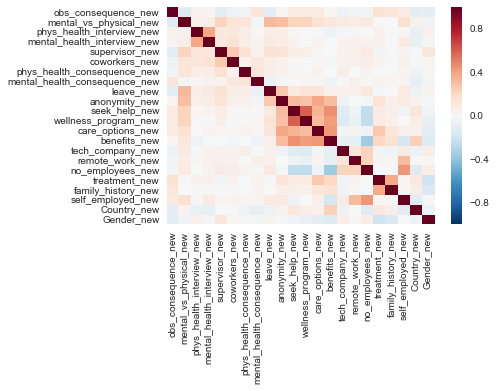

In [44]:
sns.heatmap(new_train.corr())